# Analyzing Twitter Users' Reflections using NLP
_This is a notebook by Jessica Uwoghiren._

This is a Sentiment Analysis Project using Natural Language Processing (NLP) Techniques. In December 2020, I felt it would be a good idea to obtain insights into how Twitter users felt about the year. Twitter receives over 500 million tweets per day from its users across the globe, so I only had to find a way to retrieve the data. This Notebook makes use of several Python libraries like Pandas (for Data Cleaning/Manipulation), Tweepy (for Tweets Mining), NLTK (Natural Language Toolkit), TextBlob (for Sentiment Analysis), MatPlotlib &  WordCloud (for Data Exploration), Emot (for Emojis identification), Plotly (for some Data Visualisation)

## Contents

[1. Import Libraries](#1.-Import-Libraries)

[2. Tweets Mining](#2.-Tweets-Mining)

[3. Data Cleaning](#3.-Data-Cleaning) 

[4. Location Geocoding](#4.-Location-Geocoding)

[5. Tweets Processing](#5.-Tweets-Processing)

[6. Data Exploration](#6.-Data-Exploration)

[7. Sentiment Analysis](#7.-Sentiment-Analysis)

[8. Closing Remarks and Links](#THANK-YOU-FOR-TAKING-TIME-TO-STUDY-MY-NOTEBOOK.-I-HOPE-YOU-GOT-SOME-INSIGHTS.)

## 1. Import Libraries

Import all the libraries to be used in this notebook. I prefer to do this at the initial stage and added more libraries as I went along on the project

In [1]:
import tweepy # for tweet mining
import pandas as pd # for data manipulation and analysis
import numpy as np # for working with arrays and carrying out mathematical operations. Pandas is built on Numpy
import csv # to read and write csv files
import re # In-built regular expressions library
import string # Inbuilt string library
import glob # to retrieve files/pathnames matching a specified pattern. 
import random # generating random numbers
import requests # to send HTTP requests
from PIL import Image # for opening, manipulating, and saving many different image file f
import matplotlib.pyplot as plt # for plotting

# Set the limits for Pandas Dataframe display to avoid potential system freeze
pd.set_option("display.max_rows", 15)
pd.set_option("display.max_columns", 15)
pd.set_option('display.max_colwidth', 40)

# Natural Language Processing Toolkit
from nltk.corpus import stopwords, words # get stopwords from NLTK library & get all words in english language
from nltk.tokenize import word_tokenize # to create word tokens
# from nltk.stem import PorterStemmer (I played around with Stemmer and decided to use Lemmatizer instead)
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk import pos_tag # For Parts of Speech tagging

from textblob import TextBlob # TextBlob - Python library for processing textual data

import plotly.express as px # To make express plots in Plotly
import chart_studio.tools as cst # For exporting to Chart studio
import chart_studio.plotly as py # for exporting Plotly visualizations to Chart Studio
import plotly.offline as pyo # Set notebook mode to work in offline
pyo.init_notebook_mode()
import plotly.io as pio # Plotly renderer
import plotly.graph_objects as go # For plotting plotly graph objects
from plotly.subplots import make_subplots #to make more than one plot in Plotly


# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud

from emot.emo_unicode import UNICODE_EMO, EMOTICONS # For emojis

## 2. Tweets Mining

I used the Tweepy library for Python to scrape tweets. You need a developer account with Twitter to get the keys used below for this task.

In [3]:
consumer_key = 'XXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_key= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
access_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) # Pass in Consumer key and secret for authentication by API
auth.set_access_token(access_key, access_secret) # Pass in Access key and secret for authentication by API
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True) # Sleeps when API limit is reached

### Creating User-defined Functions for Tweets Mining
I created 4 different functions for the different search queries I had and stored them in a csv file. This is because I ran the program for 3 consecutive days 22nd to 25th of December. For the 1st run, I did not have to specify the __"since_id"__ but I had to for the following days so that Twitter API does not return Tweets I already had. Another thing to note is you don't have to specify a sleep time for your function. Tweepy has a built-in attribute "wait_on_rate_limit" which I specified above.

In [4]:
def get_tweets2(search_query2, num_tweets2, since_id_num2):
    # Collect tweets using the Cursor object
    # Each item in the iterator has various attributes that you can access to get information about each tweet
    tweet_list2 = [tweets for tweets in tweepy.Cursor(api.search,
                                    q=search_query2,
                                    lang="en",
                                    since_id=since_id_num2,
                                    tweet_mode='extended').items(num_tweets2)]
    # Begin scraping the tweets individually:
    for tweet in tweet_list2[::-1]:
        tweet_id = tweet.id # get Tweet ID result
        created_at = tweet.created_at # get time tweet was created
        text = tweet.full_text # retrieve full tweet text
        location = tweet.user.location # retrieve user location
        retweet = tweet.retweet_count # retrieve number of retweets
        favorite = tweet.favorite_count # retrieve number of likes
        with open('tweets_2020_has_been.csv','a', newline='', encoding='utf-8') as csvFile2:
            csv_writer2 = csv.writer(csvFile2, delimiter=',') # create an instance of csv object
            csv_writer2.writerow([tweet_id, created_at, text, location, retweet, favorite]) # write each row

In [ ]:
search_words2 = "\"2020 has been\"" # Specifying exact phrase to search
# Exclude Links, retweets, replies
search_query2 = search_words2 + " -filter:links AND -filter:retweets AND -filter:replies" 
with open('tweets_2020_has_been.csv', encoding='utf-8') as data:
    latest_tweet = int(list(csv.reader(data))[-1][0]) # Return the most recent tweet ID
get_tweets2(search_query2, 10000, latest_tweet)

In [6]:
# Same as above
def get_tweets3(search_query3, num_tweets3, since_id_num3):
    # Collect tweets using the Cursor object
    # Each item in the iterator has various attributes that you can access to get information about each tweet
    tweet_list3 = [tweets for tweets in tweepy.Cursor(api.search,
                                    q=search_query3,
                                    since_id=since_id_num3,
                                    lang="en",
                                    tweet_mode='extended').items(num_tweets3)]

    # Begin scraping the tweets individually:
    for tweet in tweet_list3[::-1]:
        tweet_id = tweet.id
        created_at = tweet.created_at
        text = tweet.full_text
        location = tweet.user.location
        retweet = tweet.retweet_count
        favorite = tweet.favorite_count
        with open('tweets_2020_was_a.csv', 'a', newline='', encoding='utf-8') as csvFile3:
            csv_writer3 = csv.writer(csvFile3, delimiter=',')
            csv_writer3.writerow([tweet_id, created_at, text, location, retweet, favorite])

In [7]:
search_words3 = "\"2020 was a\"" # Specifying exact phrase to search
# Exclude Links, retweets, replies
search_query3 = search_words3 + " -filter:links AND -filter:retweets AND -filter:replies"
with open('tweets_2020_was_a.csv', encoding='utf-8') as data:
    latest_tweet = int(list(csv.reader(data))[-1][0]) # Return the most recent tweet ID
get_tweets3(search_query3, 10000, latest_tweet)

In [8]:
# Same as above
def get_tweets4(search_query4, num_tweets4, since_id_num4):
    # Collect tweets using the Cursor object
    # Each item in the iterator has various attributes that you can access to get information about each tweet
    tweet_list4 = [tweets for tweets in tweepy.Cursor(api.search,
                                    q=search_query4,
                                    lang="en",
                                    since_id=since_id_num4,
                                    tweet_mode='extended').items(num_tweets4)]

    # Begin scraping the tweets individually:
    for tweet in tweet_list4[::-1]:
        tweet_id = tweet.id
        created_at = tweet.created_at
        text = tweet.full_text
        location = tweet.user.location
        retweet = tweet.retweet_count
        favorite = tweet.favorite_count
        with open('tweets_this_year_has_been.csv','a', newline='', encoding='utf-8') as csvFile4:
            csv_writer4 = csv.writer(csvFile4, delimiter=',')
            csv_writer4.writerow([tweet_id, created_at, text, location, retweet, favorite])

In [ ]:
search_words4 = "\"this year has been\"" # Specifying exact phrase to search
# Exclude Links, retweets, replies
search_query4 = search_words4 + " -filter:links AND -filter:retweets AND -filter:replies"
with open('tweets_this_year_has_been.csv',encoding='utf-8') as data:
    latest_tweet=int(list(csv.reader(data))[-1][0]) # Return the most recent tweet ID
get_tweets4(search_query4,10000,latest_tweet)

In [10]:
def get_tweets5(search_query5, num_tweets5, since_id_num5):
    # Collect tweets using the Cursor object
    # Each item in the iterator has various attributes that you can access to get information about each tweet
    tweet_list5 = [tweets for tweets in tweepy.Cursor(api.search,
                                    q=search_query5,
                                    lang="en",
                                    since_id=since_id_num5,
                                    tweet_mode='extended').items(num_tweets5)]

    # Begin scraping the tweets individually:
    for tweet in tweet_list5[::-1]:
        tweet_id = tweet.id
        created_at = tweet.created_at
        text = tweet.full_text
        location = tweet.user.location
        retweet = tweet.retweet_count
        favorite = tweet.favorite_count
        with open('tweets_this_year_was_a.csv','a',newline='', encoding='utf-8') as csvFile5:
            csv_writer5 = csv.writer(csvFile5, delimiter=',')
            csv_writer5.writerow([tweet_id, created_at, text, location, retweet, favorite])

In [11]:
search_words5 = "\"this year was a\"" # Specifying exact phrase to search
search_query5 = search_words5 + " -filter:links AND -filter:retweets AND -filter:replies"
with open('tweets_this_year_was_a.csv', encoding='utf-8') as data:
    latest_tweet = int(list(csv.reader(data))[-1][0]) # Return the most recent tweet ID
get_tweets5(search_query5, 10000, latest_tweet)

### Combining all Tweets into single Pandas Dataframe

In [22]:
path = r'C:\Users\Osas\Twitter data'  # use your path
all_files = glob.glob(path + "/*.csv")

tweets = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0) # Convert each csv to a dataframe
    tweets.append(df)

tweets_df = pd.concat(tweets, axis=0, ignore_index=True) # Merge all dataframes

tweets_df.head()

tweet_id           created_at  \
0  1340701494316830727  2020-12-20 16:51:59   
1  1340701340511723525  2020-12-20 16:51:23   
2  1340701052287541248  2020-12-20 16:50:14   
3  1340701023367692288  2020-12-20 16:50:07   
4  1340700570433310726  2020-12-20 16:48:19   

                                      text             location  retweet  \
0  When you think 2020 has been bad and...  Newcastle Upon Tyne        0   
1  every single boy i hooked up with tu...                  NaN        0   
2  if you can reply to this, you made m...       north carolina        0   
3  2020 has been such a cruel year but ...      @retailthrpy_PH        0   
4  It’s official then Amsterdam is canc...           Birmingham        0   

   favorite  
0         0  
1         0  
2         0  
3         0  
4         0

## 3. Data Cleaning
The dataframe in Section 2 were cleaned in this section. Duplicate values were checked and removed. It is also important to mention that the Tweet ID was considered as the Primary key for all the dataframe. I also replaced "NaN" values in Location column because if used for Location Geocoding, "NaN" values return Coordinates which should not be.

In [23]:
tweets_df.shape #Get number of rows and columns

(50868, 6)

In [24]:
tweets_df.duplicated(subset='tweet_id').sum() # Check for duplicate values

88

In [25]:
tweets_df=tweets_df.drop_duplicates(subset=['tweet_id']) # drop duplicate values

In [26]:
tweets_df.shape # Check the shape after dropping duplicates

(50780, 6)

In [27]:
tweets_df.isna().any() # Check for "NaN" values

tweet_id      False
created_at    False
text          False
location       True
retweet       False
favorite      False
dtype: bool

In [29]:
tweets_df['location']=tweets_df['location'].fillna('No location') # Replace "NaN" values with "No Location"

In [30]:
tweets_df.isna().any() # Check for "NaN" values again

tweet_id      False
created_at    False
text          False
location      False
retweet       False
favorite      False
dtype: bool

## 4. Location Geocoding
For my final dashboard, I wanted to add a map that shows the number of tweets per country. To do that, Tableau needs basic geographic information that it can recognize. After several trials and errors, I ended up using the HERE Developer API to return Longitude, Latitude & Country names for each tweet. One key thing is if you send a request with a "NaN" or Null value to the API, it will return an actual location. This is why I had to replace "NaN" values with "No Location" in the step on Data Cleaning. __It is also important to study your dataframe to ensure you are getting the expected results. This is how I caught this discrepancy__

In [29]:
URL = "https://geocode.search.hereapi.com/v1/geocode"  # Deevloper Here API link
api_key = '#######################'  # Acquire api key from developer.here.com

def getCoordinates(location):
    PARAMS = {'apikey': api_key, 'q': location} # required parameters
    r = requests.get(url=URL, params=PARAMS)  # pass in required parameters
    # get raw json file. I did  this because when I combined this step with my "getLocation" function, 
    # it gave me error for countries with no country_code or country_name. Hence, I needed to use try - except block
    data = r.json() # Raw json file 
    return data

In [30]:
tweets_df['Location_data']=tweets_df['location'].apply(getCoordinates) # Apply getCoordinates Function

In [31]:
# a function to extract required coordinates information to the tweets_df dataframe

def getLocation(location):
    for data in location:
        if len(location['items'])>0:
            latitude = location['items'][0]['position']['lat']
            longitude = location['items'][0]['position']['lng']
            try:   
                country_code = location['items'][0]['address']['countryCode']
                country_name = location['items'][0]['address']['countryName']
                country_name = location['items'][0]['address']['countryName']
            except KeyError:
                country_code = float('Nan')
                country_name = float('Nan')
        else: 
            latitude = float('Nan')
            longitude = float('Nan')
            country_code = float('Nan') 
            country_name = float('Nan')
        result = (latitude, longitude, country_code, country_name)
    return result

In [ ]:
tweets_df['location']=tweets_df['location_data'].apply(getLocation) #apply getLocation function

In [33]:
tweets_df.head() # Check dataframe first 5 rows

tweet_id           created_at  \
0  1342121373863436288  2020-12-24 14:54:05   
1  1342121419472138240  2020-12-24 14:54:16   
2  1342121426820739084  2020-12-24 14:54:18   
3  1342121618550755330  2020-12-24 14:55:03   
4  1342121950144057344  2020-12-24 14:56:22   

                                                text  \
0  2020 has been an absolute shit year for all of...   
1  Kid this morning: It felt like it’s been 10 ye...   
2  Just wanted to take this opportunity to wish y...   
3  Reflecting on this year and I feel like I have...   
4  One good thing about 2020 has been the number ...   

                     location  retweet  favorite  \
0                 No location        0        12   
1                 No location        0         6   
2    Scotland, United Kingdom        0         7   
3  Johannesburg, South Africa        9        14   
4                     Toronto        0         4   

                                       Location_data  \
0                                      {'items': []}   
1                                      {'items': []}   
2  {'items': [{'title': 'Scotland, MD, United Sta...   
3  {'items': [{'title': 'Johannesburg, Gauteng, S...   
4  {'items': [{'title': 'Toronto, ON, Canada', 'i...   

                                    Location  
0                       (nan, nan, nan, nan)  
1                       (nan, nan, nan, nan)  
2  (38.09434, -76.36635, USA, United States)  
3   (-26.20491, 28.04006, ZAF, South Africa)  
4         (43.64869, -79.38544, CAN, Canada)

In [34]:
# Extraction of Location Coordinates and Country names to different columns
tweets_df[['Latitude', 'Longitude', 'Country_Code',
           'Country_Name']] = pd.DataFrame(tweets_df['Location'].tolist(),
                                           index=tweets_df.index)

In [35]:
tweets_df.head() # Check dataframe first 5 rows

tweet_id           created_at  \
0  1342121373863436288  2020-12-24 14:54:05   
1  1342121419472138240  2020-12-24 14:54:16   
2  1342121426820739084  2020-12-24 14:54:18   
3  1342121618550755330  2020-12-24 14:55:03   
4  1342121950144057344  2020-12-24 14:56:22   

                                                text  \
0  2020 has been an absolute shit year for all of...   
1  Kid this morning: It felt like it’s been 10 ye...   
2  Just wanted to take this opportunity to wish y...   
3  Reflecting on this year and I feel like I have...   
4  One good thing about 2020 has been the number ...   

                     location  retweet  favorite  \
0                 No location        0        12   
1                 No location        0         6   
2    Scotland, United Kingdom        0         7   
3  Johannesburg, South Africa        9        14   
4                     Toronto        0         4   

                                       Location_data  \
0                                      {'items': []}   
1                                      {'items': []}   
2  {'items': [{'title': 'Scotland, MD, United Sta...   
3  {'items': [{'title': 'Johannesburg, Gauteng, S...   
4  {'items': [{'title': 'Toronto, ON, Canada', 'i...   

                                    Location  Latitude  Longitude  \
0                       (nan, nan, nan, nan)       NaN        NaN   
1                       (nan, nan, nan, nan)       NaN        NaN   
2  (38.09434, -76.36635, USA, United States)  38.09434  -76.36635   
3   (-26.20491, 28.04006, ZAF, South Africa) -26.20491   28.04006   
4         (43.64869, -79.38544, CAN, Canada)  43.64869  -79.38544   

  Country_Code   Country_Name  
0          NaN            NaN  
1          NaN            NaN  
2          USA  United States  
3          ZAF   South Africa  
4          CAN         Canada

In [35]:
# Drop unnecessary columns
tweets_df.drop(['Location_data','location','Location'], axis=1, inplace=True)
# Rename columns
tweets_df.columns=['Tweet_ID','Time_Created','Tweet','Retweet_Count','Favorite_Count',
                   'Latitude','Longitude','Country_Code','Country_Name']

In [38]:
tweets_df.head() # Check dataframe first 5 rows

Tweet_ID         Time_Created  \
0  1340701494316830727  2020-12-20 16:51:59   
1  1340701340511723525  2020-12-20 16:51:23   
2  1340701052287541248  2020-12-20 16:50:14   
3  1340701023367692288  2020-12-20 16:50:07   
4  1340700570433310726  2020-12-20 16:48:19   

                                     Tweet  Retweet_Count  Favorite_Count  \
0  When you think 2020 has been bad and...              0               0   
1  every single boy i hooked up with tu...              0               0   
2  if you can reply to this, you made m...              0               0   
3  2020 has been such a cruel year but ...              0               0   
4  It’s official then Amsterdam is canc...              0               0   

   Latitude  Longitude Country_Code   Country_Name  
0  54.97789   -1.61162          GBR        England  
1       NaN        NaN          NaN            NaN  
2  35.78547  -78.64270          USA  United States  
3       NaN        NaN          NaN            NaN  
4  52.47891   -1.90592          GBR        England

## 5. Tweets Processing
To reach the ultimate goal, there was a need to clean up the individual tweets. To make this easy, I created several functions in my Python code which I further applied to the "Tweets" column in my Pandas data frame to produce the desired results. 
Also, for my Word Cloud, I wanted to only show the words used to describe 2020, so I created a function to extract only the adjectives to a new column.

In [30]:
# Function to remove punctuations, links, emojis, and stop words
def preprocessTweets(tweet):
    tweet = tweet.lower()  #has to be in place
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#|\d+', '', tweet)
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)  # convert string to tokens
    filtered_words = [w for w in tweet_tokens if w not in stop_words]
    filtered_words = [w for w in filtered_words if w not in emojis]
    filtered_words = [w for w in filtered_words if w in word_list]

    # Remove punctuations
    unpunctuated_words = [char for char in filtered_words if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)

    return "".join(unpunctuated_words)  # join words with a space in between them


# function to obtain adjectives from tweets
def getAdjectives(tweet):
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [31]:
# Defining my NLTK stop words and my user-defined stop words
stop_words = list(stopwords.words('english'))
user_stop_words = ['2020', 'year', 'many', 'much', 'amp', 'next', 'cant', 'wont', 'hadnt',
                    'havent', 'hasnt', 'isnt', 'shouldnt', 'couldnt', 'wasnt', 'werent',
                    'mustnt', '’', '...', '..', '.', '.....', '....', 'been…', 'one', 'two',
                    'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'aht',
                    've', 'next']
alphabets = list(string.ascii_lowercase)
stop_words = stop_words + user_stop_words + alphabets
word_list = words.words()  # all words in English language
emojis = list(UNICODE_EMO.keys())  # full list of emojis

### An example of how the above function works is shown below

In [63]:
print(preprocessTweets("2020 was a year of difficulty. It was sad, but I am happy with how things worked out for me"))

difficulty sad happy worked


In [33]:
# Apply preProcessTweets function to the 'Tweet' column to generate a new column called 'Processed Tweets'.
# This took 23 mins to run for 50,780 rows
tweets_df['Processed_Tweets'] = tweets_df['Tweet'].apply(preprocessTweets)

In [34]:
# Apply getAdjectives function to the new 'Processed Tweets' column to generate a new column called 'Tweets_Adjectives'
tweets_df['Tweets_Adjectives'] = tweets_df['Processed_Tweets'].apply(getAdjectives)

In [35]:
tweets_df.head() # Check dataframe first 5 rows

Tweet_ID         Time_Created  \
0  1340701494316830727  2020-12-20 16:51:59   
1  1340701340511723525  2020-12-20 16:51:23   
2  1340701052287541248  2020-12-20 16:50:14   
3  1340701023367692288  2020-12-20 16:50:07   
4  1340700570433310726  2020-12-20 16:48:19   

                                     Tweet  Retweet_Count  Favorite_Count  \
0  When you think 2020 has been bad and...              0               0   
1  every single boy i hooked up with tu...              0               0   
2  if you can reply to this, you made m...              0               0   
3  2020 has been such a cruel year but ...              0               0   
4  It’s official then Amsterdam is canc...              0               0   

   Latitude  Longitude Country_Code   Country_Name  \
0  54.97789   -1.61162          GBR        England   
1       NaN        NaN          NaN            NaN   
2  35.78547  -78.64270          USA  United States   
3       NaN        NaN          NaN            NaN   
4  52.47891   -1.90592          GBR        England   

                          Processed_Tweets    Tweets_Adjectives  
0            think bad see phrase mutation           bad phrase  
1     every single boy hooked turned awful  single turned awful  
2  reply made yes really rough made bet...          rough worth  
3  cruel thank goodness met people made...             bearable  
4                             official cat             official

In [39]:
# function to return words to their base form using Lemmatizer
def preprocessTweetsSentiments(tweet):
    tweet_tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(w) for w in tweet_tokens]
    return " ".join(lemma_words)

In [40]:
# Apply preprocessTweetsSentiments function to the 'Processed Tweets' column to generate a new column
# called 'Processed_Tweets'
tweets_df['Tweets_Sentiments'] = tweets_df['Processed_Tweets'].apply(preprocessTweetsSentiments)

In [41]:
tweets_df.head() # Check dataframe first 5 rows

Tweet_ID         Time_Created  \
0  1340701494316830727  2020-12-20 16:51:59   
1  1340701340511723525  2020-12-20 16:51:23   
2  1340701052287541248  2020-12-20 16:50:14   
3  1340701023367692288  2020-12-20 16:50:07   
4  1340700570433310726  2020-12-20 16:48:19   

                                     Tweet  Retweet_Count  Favorite_Count  \
0  When you think 2020 has been bad and...              0               0   
1  every single boy i hooked up with tu...              0               0   
2  if you can reply to this, you made m...              0               0   
3  2020 has been such a cruel year but ...              0               0   
4  It’s official then Amsterdam is canc...              0               0   

   Latitude  Longitude Country_Code   Country_Name  \
0  54.97789   -1.61162          GBR        England   
1       NaN        NaN          NaN            NaN   
2  35.78547  -78.64270          USA  United States   
3       NaN        NaN          NaN            NaN   
4  52.47891   -1.90592          GBR        England   

                          Processed_Tweets    Tweets_Adjectives  \
0            think bad see phrase mutation           bad phrase   
1     every single boy hooked turned awful  single turned awful   
2  reply made yes really rough made bet...          rough worth   
3  cruel thank goodness met people made...             bearable   
4                             official cat             official   

                         Tweets_Sentiments  
0            think bad see phrase mutation  
1     every single boy hooked turned awful  
2  reply made yes really rough made bet...  
3  cruel thank goodness met people made...  
4                             official cat

In [43]:
# I had to write my results to a csv file at every instance due to the amount of time it took for the preprocessTweets
#  function to run
tweets_df.to_csv('Tweets_Processed.csv',encoding='utf-8-sig', index=False) 
# Also, encoding is important when writing text to csv file

## 6. Data Exploration
In this section, the aim was to show the most common words used by Twitter Users to describe 2020. This was made possible by the "getAdjectives" function in Section 5. I also made use of WordCloud and MatPlotlib for this task.

In [44]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = tweets_df['Tweets_Adjectives'].tolist()
tweets_long_string = " ".join(tweets_long_string)

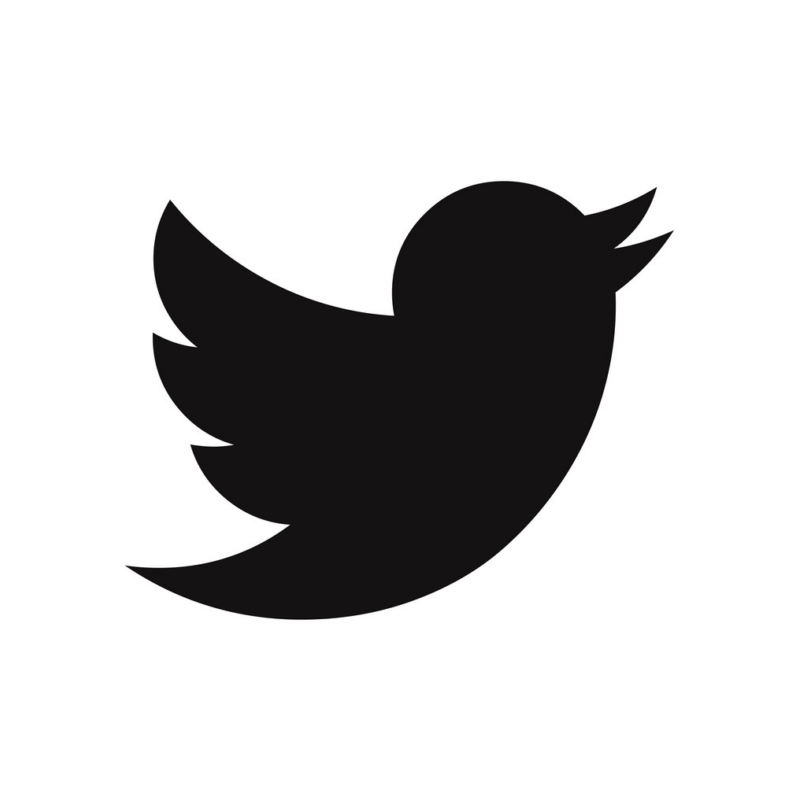

In [58]:
# Import Twitter Logo
image = np.array(Image.open('twitter.png'))
    
fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off') # Remove axis
plt.show() # Display image

In [59]:
# Create function to generate the blue colour for the Word CLoud

def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

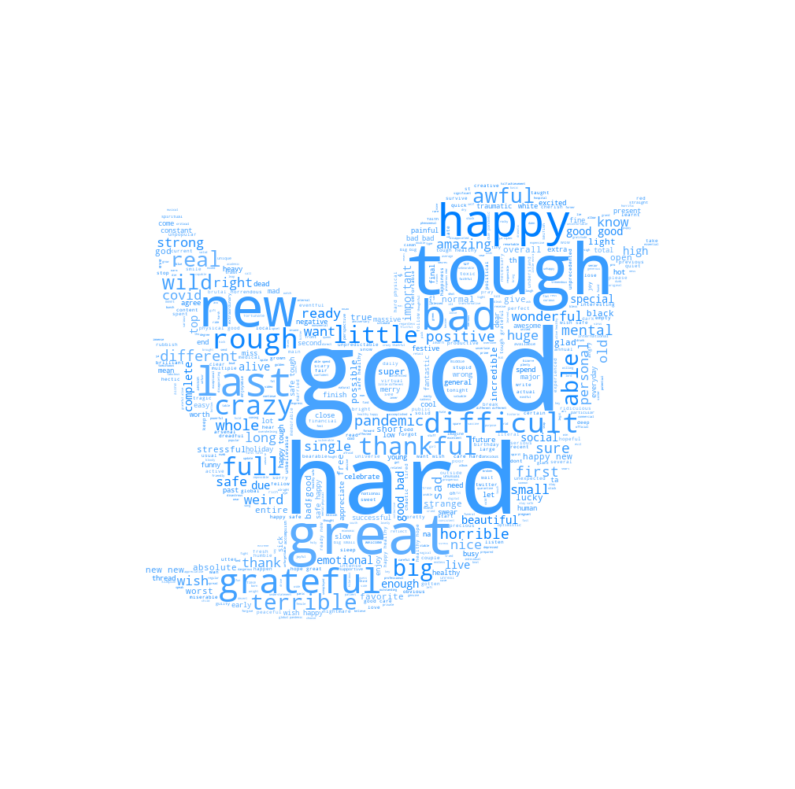

In [60]:
# Instantiate the Twitter word cloud object
twitter_wc = WordCloud(background_color='white', max_words=1500, mask=image)

# generate the word cloud
twitter_wc.generate(tweets_long_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)  # set width
fig.set_figheight(18)  # set height

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

In [63]:
twitter_wc.to_file("wordcloud.png") #save to a png file

#### Analyzing Top Words in the Word Cloud

In [45]:
# Combine all words into a list
tweets_long_string = tweets_df['Tweets_Adjectives'].tolist()
tweets_list=[]
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [46]:
# Use the Built-in Python Collections module to determine Word frequency
from collections import Counter
counts = Counter(tweets_list)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ['Words', 'Count']
df.sort_values(by='Count', ascending=False, inplace=True)

In [47]:
df.head(10)  # Check dataframe first 10 rows

Words  Count
24        good   4205
51       tough   2871
78         new   2807
159      happy   2689
48        hard   2668
0          bad   2329
28       great   2185
116       last   1504
10    grateful   1432
65   difficult   1232

### Top 10 Words in Twitter Users' 2020 Reflections

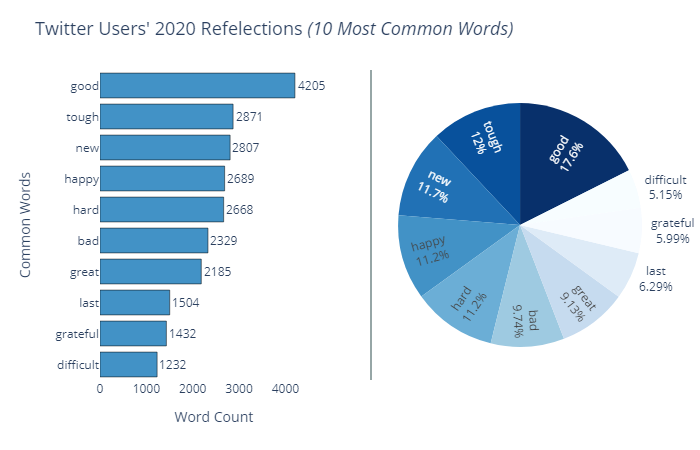

In [54]:
# print(px.colors.sequential.Blues_r) to get the colour list used here. Please note, I swatched some colours

# Define my colours for the Plotly Plot
colors = ['rgb(8,48,107)', 'rgb(8,81,156)', 'rgb(33,113,181)', 'rgb(66,146,198)',
            'rgb(107,174,214)', 'rgb(158,202,225)', 'rgb(198,219,239)',
            'rgb(222,235,247)', 'rgb(247,251,255)', 'rgb(247,253,255)']

# Set layout for Plotly Subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, { "type": "domain"}]],
                    vertical_spacing=0.001)

# Add First Plot
fig.add_trace(go.Bar(x = df['Count'].head(10), y=df['Words'].head(10),marker=dict(color='rgba(66,146,198, 1)',
            line=dict(color='Black'),),name='Bar Chart',orientation='h'), 1, 1)

# Add Second Plot
fig.add_trace(go.Pie(labels=df['Words'].head(10),values=df['Count'].head(15),textinfo='label+percent',
                    insidetextorientation='radial', marker=dict(colors=colors, line=dict(color='DarkSlateGrey')),
                    name='Pie Chart'), 1, 2)
# customize layout
fig.update_layout(shapes=[dict(type="line",xref="paper", yref="paper", x0=0.5, y0=0, x1=0.5, y1=1.0,
         line_color='DarkSlateGrey', line_width=1)])

# customize plot title
fig.update_layout(showlegend=False, title=dict(text="Twitter Users' 2020 Refelections <i>(10 Most Common Words)</i>",
                  font=dict(size=18, )))

# Customize backgroound, margins, axis, title
fig.update_layout(yaxis=dict(showgrid=False,
                             showline=False,
                             showticklabels=True,
                             domain=[0, 1],
                             categoryorder='total ascending',
                             title=dict(text='Common Words', font_size=14)),
                             xaxis=dict(zeroline=False,
                             showline=False,
                             showticklabels=True,
                             showgrid=True,
                             domain=[0, 0.42],
                             title=dict(text='Word Count', font_size=14)),
                             margin=dict(l=100, r=20, t=70, b=70),
                             paper_bgcolor='rgba(0,0,0,0)',
                             plot_bgcolor='rgba(0,0,0,0)')

# Specify X and Y values for Annotations
x = df['Count'].head(10).to_list()
y = df['Words'].head(10).to_list()

# Show annotations on plot
annotations = [dict(xref='x1', yref='y1', x=xa + 350, y=ya, text=str(xa), showarrow=False) for xa, ya in zip(x, y)]

fig.update_layout(annotations=annotations)
fig.show(renderer = 'png')

In [331]:
# Export to Plot to Chart Studio using my Chart Studio Credentials
py.plot(fig, filename = 'Twitter Users 2020 Refelections (10 Most Common Words)', auto_open=True)

'https://plotly.com/~jess-data/63/'

## 7. Sentiment Analysis
In this section, the aim was to show the most common words used by Twitter Users to describe 2020. This was made possible byt the getAdjectives function. I also made use of WordCloud and MatPlotlib for this task.

In [55]:
# Create function to obtain Subjectivity Score
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

# Create function to obtain Polarity Score
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Create function to obtain Sentiment category
def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [56]:
# Apply all functions above to respective columns
tweets_df['Subjectivity']=tweets_df['Tweets_Sentiments'].apply(getSubjectivity)
tweets_df['Polarity']=tweets_df['Tweets_Sentiments'].apply(getPolarity)
tweets_df['Sentiment']=tweets_df['Polarity'].apply(getSentimentTextBlob)

In [75]:
# See quick results of the Sentiment Analysis
tweets_df['Sentiment'].value_counts()

Positive    25225
Negative    15963
Neutral      9592
Name: Sentiment, dtype: int64

In [76]:
# Create dataframe for Count of Sentiment Categories
bar_chart = tweets_df['Sentiment'].value_counts().rename_axis('Sentiment').to_frame('Total Tweets').reset_index()

In [77]:
bar_chart # Display dataframe

Sentiment  Total Tweets
0  Positive         25225
1  Negative         15963
2   Neutral          9592

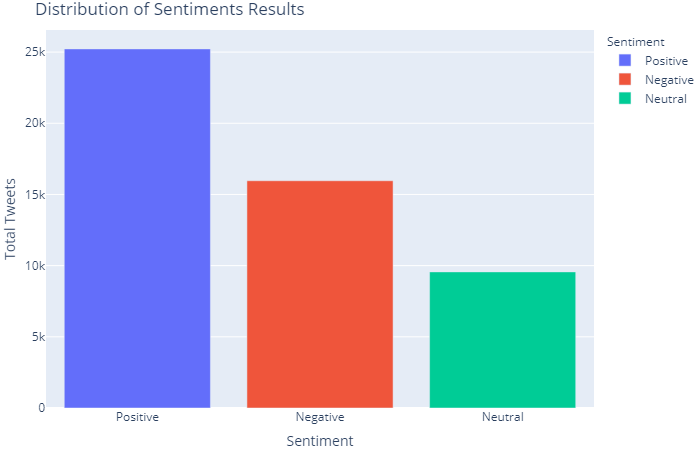

In [62]:
sentiments_barchart = px.bar(bar_chart, x = 'Sentiment', y='Total Tweets', color='Sentiment')

sentiments_barchart.update_layout(title='Distribution of Sentiments Results',
                                  margin={"r": 0, "t": 30, "l": 0, "b": 0})

sentiments_barchart.show(renderer = 'png') #Display plot. 

# I used renderer so that the plots show on the web when people view my notebook. 
# For interactive plots, exclude the "renderer" argument
# Note, I further customized the plot on Chart Studio for my Medium post

In [121]:
# Export to Plot to Chart Studio using my Chart Studio Credentials. 
py.plot(sentiments_barchart, filename = 'Distribution of Sentiments Results', auto_open=True)

'https://plotly.com/~jess-data/59/'

## WE MADE IT!! 
### Preview the resulting dataframe in preparation for export to Tableau

In [78]:
tweets_df.head() # Check dataframe first 5 rows

Tweet_ID         Time_Created  \
0  1340701494316830727  2020-12-20 16:51:59   
1  1340701340511723525  2020-12-20 16:51:23   
2  1340701052287541248  2020-12-20 16:50:14   
3  1340701023367692288  2020-12-20 16:50:07   
4  1340700570433310726  2020-12-20 16:48:19   

                                     Tweet  Retweet_Count  Favorite_Count  \
0  When you think 2020 has been bad and...              0               0   
1  every single boy i hooked up with tu...              0               0   
2  if you can reply to this, you made m...              0               0   
3  2020 has been such a cruel year but ...              0               0   
4  It’s official then Amsterdam is canc...              0               0   

   Latitude  Longitude Country_Code   Country_Name  \
0  54.97789   -1.61162          GBR        England   
1       NaN        NaN          NaN            NaN   
2  35.78547  -78.64270          USA  United States   
3       NaN        NaN          NaN            NaN   
4  52.47891   -1.90592          GBR        England   

                          Processed_Tweets    Tweets_Adjectives  \
0            think bad see phrase mutation           bad phrase   
1     every single boy hooked turned awful  single turned awful   
2  reply made yes really rough made bet...          rough worth   
3  cruel thank goodness met people made...             bearable   
4                             official cat             official   

                         Tweets_Sentiments  Subjectivity  Polarity Sentiment  
0            think bad see phrase mutation      0.666667 -0.700000  Negative  
1     every single boy hooked turned awful      0.607143 -0.535714  Negative  
2  reply made yes really rough made bet...      0.400000  0.300000  Positive  
3  cruel thank goodness met people made...      1.000000 -1.000000  Negative  
4                             official cat      0.000000  0.000000   Neutral

In [47]:
# Remove Unnecessary columns. I used copy here because I wanted a datframe that does not impact my original dataframe
tableau_df = tweets_df.drop((['Processed_Tweets','Tweets_Sentiments','Subjectivity','Polarity']), axis=1).copy(deep=True)

In [333]:
tableau_df.head() # Check dataframe first 5 rows

Tweet_ID         Time_Created  \
0  1340701494316830976  2020-12-20 16:51:59   
1  1340701340511724032  2020-12-20 16:51:23   
2  1340701052287540992  2020-12-20 16:50:14   
3  1340701023367692032  2020-12-20 16:50:07   
4  1340700570433310976  2020-12-20 16:48:19   

                                     Tweet  Retweet_Count  Favorite_Count  \
0  When you think 2020 has been bad and...              0               0   
1  every single boy i hooked up with tu...              0               0   
2  if you can reply to this, you made m...              0               0   
3  2020 has been such a cruel year but ...              0               0   
4  It’s official then Amsterdam is canc...              0               0   

   Latitude  Longitude Country_Code   Country_Name    Tweets_Adjectives  \
0  54.97789   -1.61162          GBR        England           bad phrase   
1       NaN        NaN          NaN            NaN  single turned awful   
2  35.78547  -78.64270          USA  United States          rough worth   
3       NaN        NaN          NaN            NaN             bearable   
4  52.47891   -1.90592          GBR        England             official   

  Sentiment  
0  Negative  
1  Negative  
2  Positive  
3  Negative  
4   Neutral

In [339]:
# Export to Excel file. You can link Python to Tableau by the way but I Ihaven't learned that yet
tableau_df.to_excel('Tweets_Tableau_Final_File.xlsx', encoding='utf-8-sig', index=False)

## THANK YOU FOR TAKING TIME TO STUDY MY NOTEBOOK. I HOPE YOU GOT SOME INSIGHTS.
## You can use the links below to view my other pages

[Medium Page](https://jess-analytics.medium.com/)

[Tableau Dashboard](https://public.tableau.com/views/TwitterUsers2020ReflectionsDashboard/FinalDashboard?:language=en-GB&:display_count=y&publish=yes&:origin=viz_share_link)

[LinkedIn Page](https://www.linkedin.com/in/jessicauwoghiren/)

[Twitter Page](https://twitter.com/jessica_xls)

[My Data Community Placeholder Website](https://linktr.ee/DataTechSpace)

